In [48]:
import networkx as nx
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

In [49]:
G = nx.DiGraph()

department_labels = 'email-Eu-core-department-labels.txt'
email = 'email-Eu-core.txt'

department_labels_csv = pd.read_csv(department_labels, sep=',')
email_csv = pd.read_csv(email, sep=',')

department_labels_csv.head()
email_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [50]:
i = 0
dep_color = []
for name in mcolors.CSS4_COLORS:
    i+=1
    if(i == 43):
        break
    dep_color.append(name)
# print(len(dep_color))
# for i in dep_color:
#     print(i)

color_map = []
for i in range(len(department_labels_csv)):
    color_map.append(dep_color[department_labels_csv['dep'][i]])
    # print(color_map[i])

print((len(color_map)))


1005


In [51]:
# G.add_nodes_from()
G.add_edges_from(email_csv.to_numpy())


In [52]:
# nx.draw(G, node_color=color_map)
# plt.show()

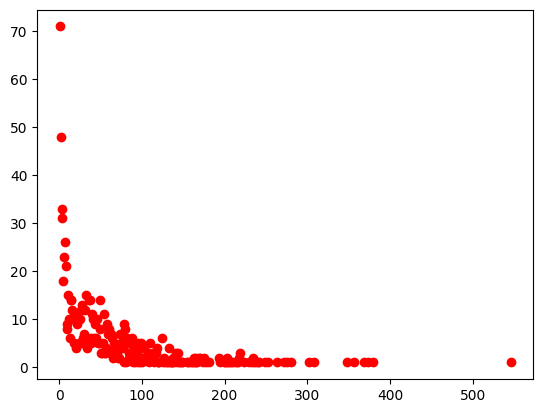

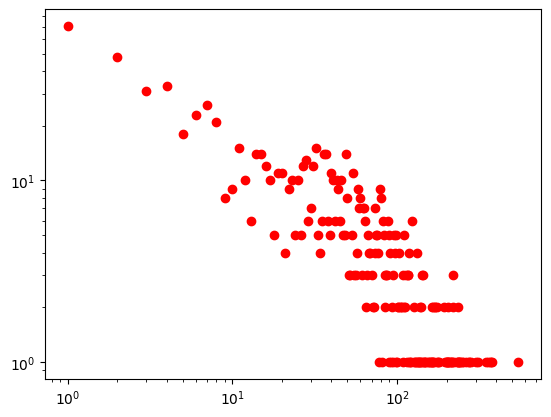

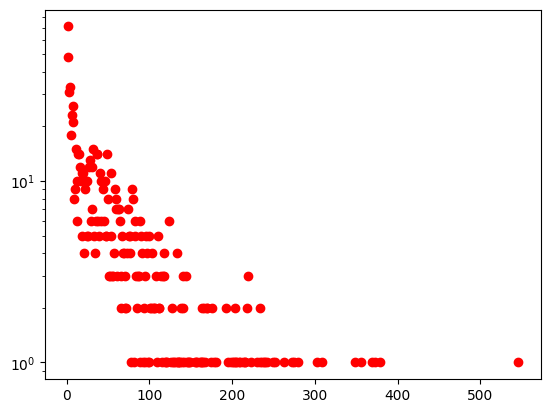

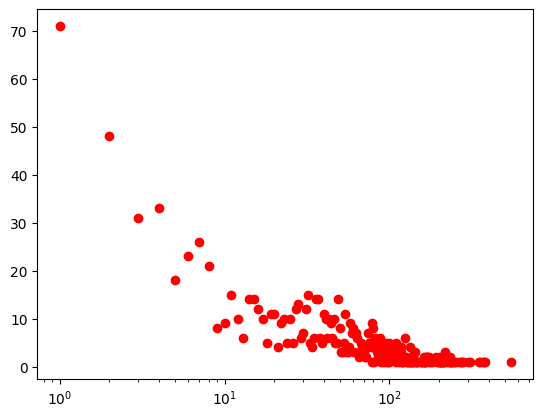

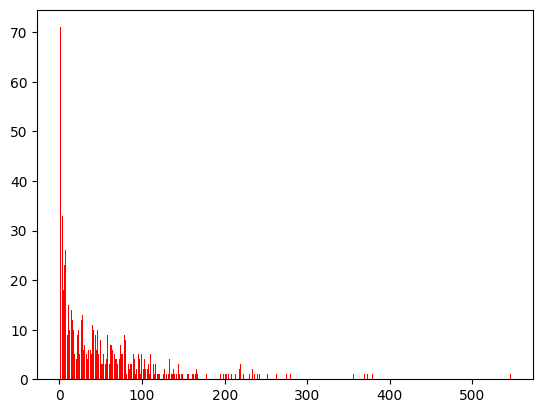

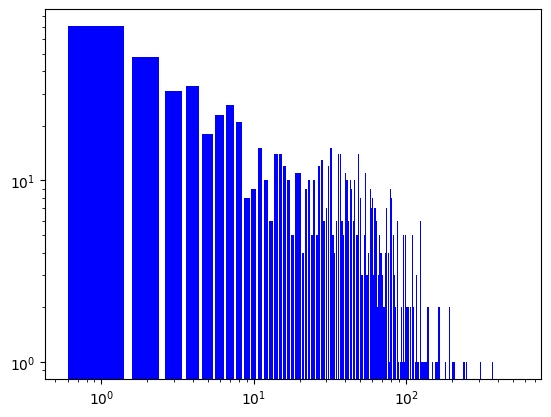

In [53]:
degree = np.array(G.degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
plt.plot(unique_elements, counts_elements, 'ro')
plt.show()
print()

plt.loglog(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogy(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogx(unique_elements, counts_elements, 'ro')
plt.show()

plt.bar(unique_elements, counts_elements, color='r')
# plt.xscale('log')
plt.show()

plt.bar(unique_elements, counts_elements, color='b', log=True)
plt.xscale('log')
plt.show()

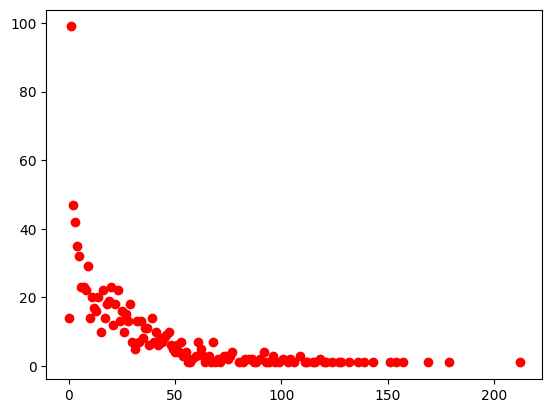

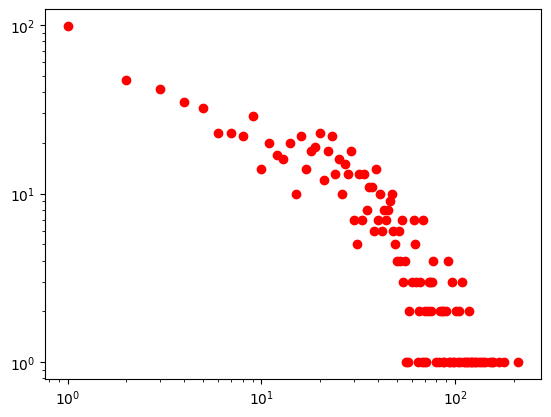

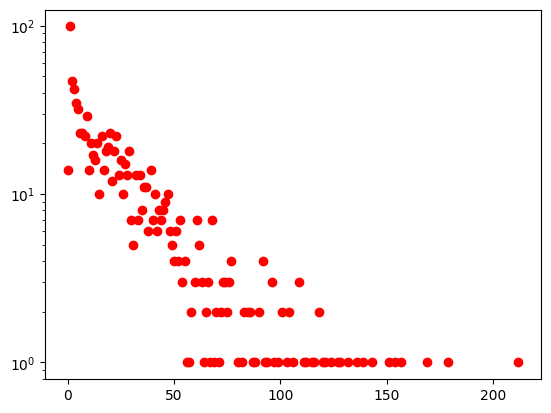

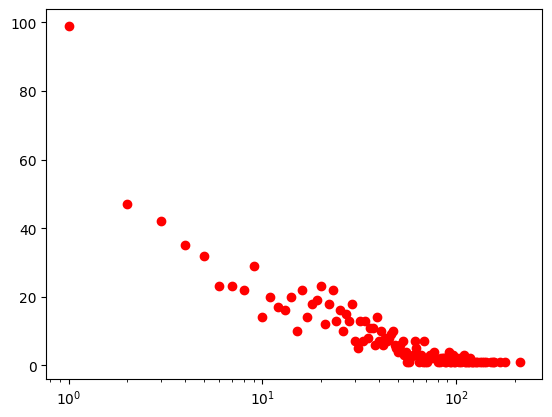

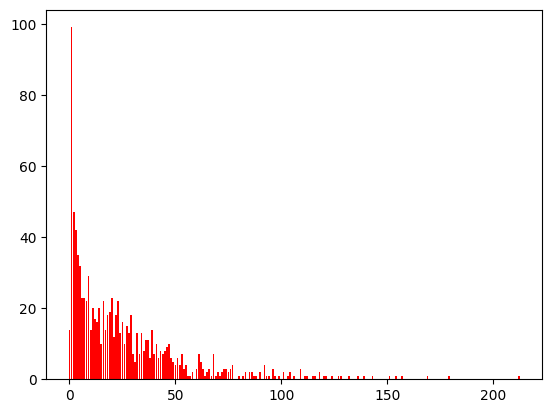

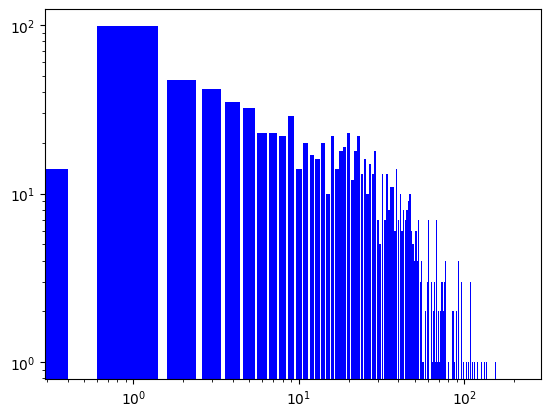

In [54]:
degree = np.array(G.in_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
plt.plot(unique_elements, counts_elements, 'ro')
plt.show()
print()

plt.loglog(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogy(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogx(unique_elements, counts_elements, 'ro')
plt.show()

plt.bar(unique_elements, counts_elements, color='r')
# plt.xscale('log')
plt.show()

plt.bar(unique_elements, counts_elements, color='b', log=True)
plt.xscale('log')
plt.show()

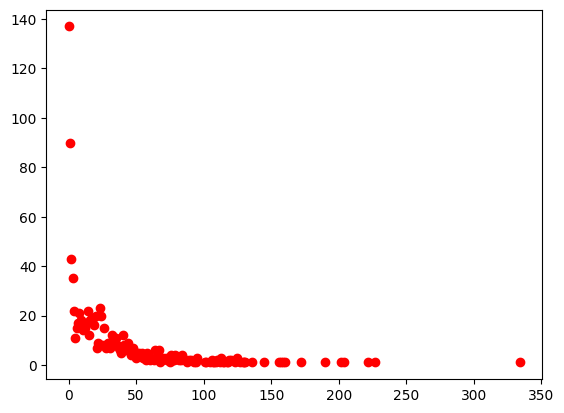

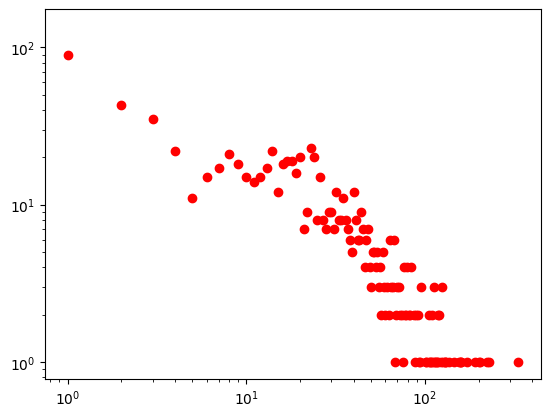

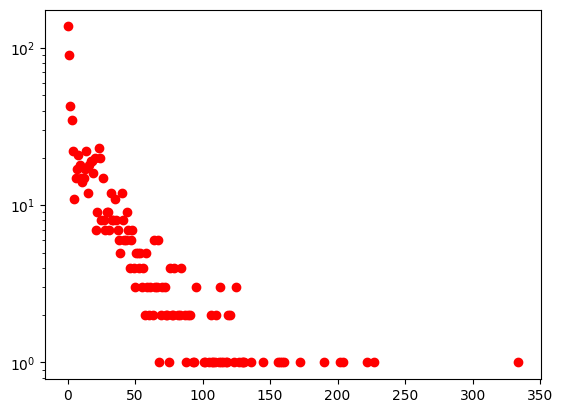

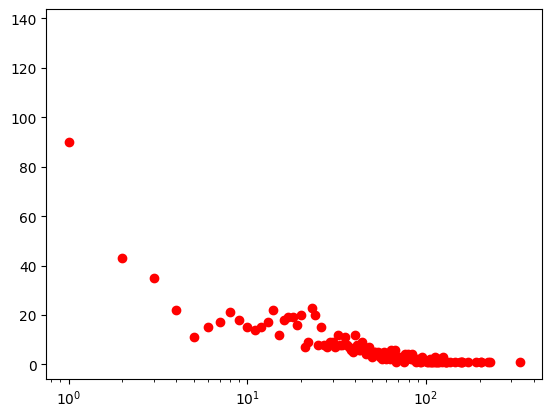

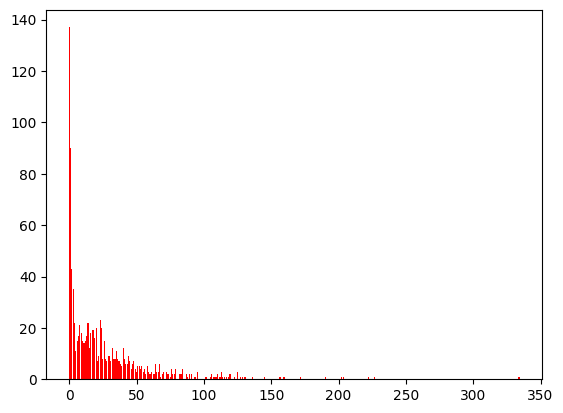

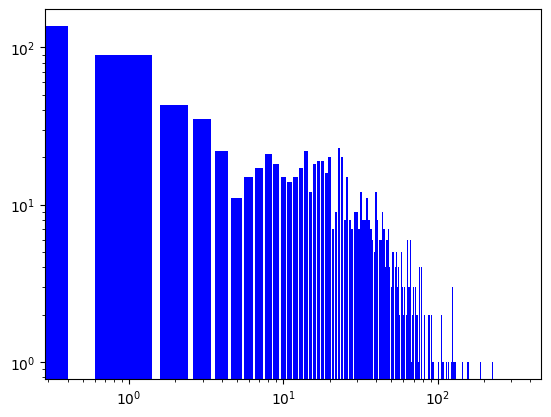

In [55]:
degree = np.array(G.out_degree)[:,1]
unique_elements, counts_elements = np.unique(degree, return_counts=True)
plt.plot(unique_elements, counts_elements, 'ro')
plt.show()
print()

plt.loglog(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogy(unique_elements, counts_elements, 'ro')
plt.show()

plt.semilogx(unique_elements, counts_elements, 'ro')
plt.show()


plt.bar(unique_elements, counts_elements, color='r')
# plt.xscale('log')
plt.show()

plt.bar(unique_elements, counts_elements, color='b', log=True)
plt.xscale('log')
plt.show()

In [56]:
H = nx.DiGraph()

email_short = 'email-Eu-core.txt'

email_short_csv = pd.read_csv(email_short, sep=',')

email_short_csv.head()

,u,v
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [57]:
# G.add_nodes_from()
H.add_edges_from(email_short_csv.to_numpy())

In [58]:
# nx.draw(H, node_color=color_map)
# plt.show()

In [59]:
undirected_G = nx.Graph()

undirected_G.add_edges_from(email_csv.to_numpy())
undirected_G.remove_edges_from(nx.selfloop_edges(undirected_G))
undirected_G.remove_nodes_from(list(nx.isolates(undirected_G)))

In [60]:
# from community import community_louvain
# import matplotlib.cm as cm
# import matplotlib.pyplot as plt
# import networkx as nx

# part_dict = dict(department_labels_csv.values.tolist())

# # compute the best partition
# partition = community_louvain.best_partition(undirected_G, partition = part_dict)

# # draw the graph
# pos = nx.spring_layout(undirected_G)
# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
# nx.draw_networkx_nodes(undirected_G, pos, partition.keys(), node_size=40,
#                        cmap=cmap, node_color=list(partition.values()))
# nx.draw_networkx_edges(undirected_G, pos, alpha=0.5)
# plt.show()

In [61]:
# print((partition))
# print(max(partition. values()))
# print(min(partition. values()))

In [75]:
def newmanAlgo(oldgraph, num_iter = 10, max_components = 42):
    graph = oldgraph.copy()
    edge_betweenness = nx.edge_betweenness_centrality(graph).items()

    sorted(edge_betweenness, key=lambda pair: -pair[1])

    betweenness = [pair[1] for pair in edge_betweenness]
    mean_betweenness = np.mean(betweenness)
    median_betweenness = np.median(betweenness)
    max_betweenness = np.max(betweenness)
    min_betweenness = np.min(betweenness)

    print("Mean betweenness: ", mean_betweenness)
    print("Median betweenness: ", median_betweenness)
    print("Max betweenness: ", max_betweenness)
    print("Min betweenness: ", min_betweenness)

    x = num_iter//10
    for i in range(num_iter):
        edge_betweenness = sorted(nx.edge_betweenness_centrality(graph).items(), key=lambda pair: -pair[1])
        
        edge_to_delete = edge_betweenness[0][0]
        
        graph.remove_edge(*edge_to_delete)
        print('Step %s\nEdge %s Deleted'%(i, edge_to_delete),end=', ')
        print('Max Edge Betweenness: ', edge_betweenness[0][1], end=', ')
        mean_betweenness1 = np.mean([pair[1] for pair in edge_betweenness])
        print('Mean Edge Betweenness: ', mean_betweenness1, end=', ')
        if(mean_betweenness1 < 0.9*mean_betweenness):
            break
        
        num_components = len(list(nx.connected_components(graph)))
        print("connected components: ",num_components)
        if(num_components == max_components):
            break
        # if(i%x == 0):
        #     nx.draw(graph, with_labels=True, node_color='r')
        #     plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)
            
            # plt.show()
    return graph, num_components

In [76]:
new_undirected_G_newman, num_comp_1 = newmanAlgo(undirected_G, 100, 42)

Mean betweenness:  0.0001610392072221406
Median betweenness:  9.507376644472446e-05
Max betweenness:  0.004392498491556038
Min betweenness:  2.05928686895728e-06
Step 0
Edge (414, 443) Deleted, Max Edge Betweenness:  0.004392498491556038, Mean Edge Betweenness:  0.00016103920722214057, connected components:  1
Step 1
Edge (370, 414) Deleted, Max Edge Betweenness:  0.004729379323077292, Mean Edge Betweenness:  0.00016112358906807331, connected components:  1
Step 2
Edge (86, 415) Deleted, Max Edge Betweenness:  0.004982937135931306, Mean Edge Betweenness:  0.00016124567475556782, connected components:  1
Step 3
Edge (5, 697) Deleted, Max Edge Betweenness:  0.006160433065043993, Mean Edge Betweenness:  0.00016144175662603742, connected components:  1
Step 4
Edge (414, 645) Deleted, Max Edge Betweenness:  0.003430969807234877, Mean Edge Betweenness:  0.00016165042892470744, connected components:  1
Step 5
Edge (414, 479) Deleted, Max Edge Betweenness:  0.0048674009424476035, Mean Edge Bet

In [77]:
components = nx.connected_components(new_undirected_G_newman)
components = list(components)
print(components)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [ ]:

# from networkx.algorithms.community.centrality import girvan_newman
# comp = girvan_newman(undirected_G)

# node_groups = []
# for com in next(comp):
#     node_groups.append(list(com))

# print(node_groups)